In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
Data1=pd.read_csv('allprojects.csv')
Data1

,ID,Name,Proponent,Project Type,AFOLU Activities,Methodology,Status,Country/Area,Estimated Annual Emission Reductions,Region,Project Registration Date,Crediting Period Start Date,Crediting Period End Date
0,5214,Pingjiang County Domestic Waste Harmless Landf...,"Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,NaN,ACM0001,Under validation,China,60882,NaN,NaN,21-03-2023,20-03-2033
1,5210,Panzhou County Chicken Farm Manure Composting ...,"Guizhou Hanwei Egg Industry Co., Ltd.","Livestock, enteric fermentation, and manure ma...",NaN,AMS-III.F.,Under validation,China,35865,NaN,NaN,05-01-2023,04-01-2033
2,5208,Small Scale LED Lighting Grouped Project in So...,Energy LED (Pty) Ltd,Energy demand,NaN,AMS-II.C.,Under validation,South Africa,7583,Africa,NaN,01-12-2022,30-11-2032
3,5203,"Luoding BCCY New Power CO., Ltd. MSW biogas to...","Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,NaN,ACM0001,Under validation,China,44555,Asia,NaN,28-12-2022,27-12-2032
4,5205,Agroforestry for Enhancing the Smallholders’ L...,GKF Agroforestry Pvt Ltd,Agriculture Forestry and Other Land Use,ARR,VM0047,Under development,India,160686,Asia,NaN,01-08-2021,31-07-2041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,2162,2 x 3.5 MW Ullunkal Hydro Power Project in Ker...,Multiple Proponents,Energy industries (renewable/non-renewable sou...,NaN,AMS-I.D.,Withdrawn,India,16125,NaN,NaN,NaN,NaN
4351,2157,BAESA Project `,MER,Energy industries (renewable/non-renewable sou...,NaN,ACM0002,Withdrawn,Brazil,318793,NaN,06-03-2012,NaN,NaN
4352,2136,cancelled duplicate of VCSR218,MER,Energy industries (renewable/non-renewable sou...,NaN,ACM0002,Withdrawn,China,115912,NaN,25-09-2013,NaN,NaN
4353,2126,7.3 MW Bundled Wind Power Project by Oswal Cables,Oswal Cables Private Limted,Manufacturing industries,NaN,ACM0002,Withdrawn,India,14832,NaN,NaN,NaN,NaN


In [4]:
Data1.drop('AFOLU Activities',axis=1,inplace=True)

In [5]:
Data1

,ID,Name,Proponent,Project Type,Methodology,Status,Country/Area,Estimated Annual Emission Reductions,Region,Project Registration Date,Crediting Period Start Date,Crediting Period End Date
0,5214,Pingjiang County Domestic Waste Harmless Landf...,"Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,ACM0001,Under validation,China,60882,NaN,NaN,21-03-2023,20-03-2033
1,5210,Panzhou County Chicken Farm Manure Composting ...,"Guizhou Hanwei Egg Industry Co., Ltd.","Livestock, enteric fermentation, and manure ma...",AMS-III.F.,Under validation,China,35865,NaN,NaN,05-01-2023,04-01-2033
2,5208,Small Scale LED Lighting Grouped Project in So...,Energy LED (Pty) Ltd,Energy demand,AMS-II.C.,Under validation,South Africa,7583,Africa,NaN,01-12-2022,30-11-2032
3,5203,"Luoding BCCY New Power CO., Ltd. MSW biogas to...","Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,ACM0001,Under validation,China,44555,Asia,NaN,28-12-2022,27-12-2032
4,5205,Agroforestry for Enhancing the Smallholders’ L...,GKF Agroforestry Pvt Ltd,Agriculture Forestry and Other Land Use,VM0047,Under development,India,160686,Asia,NaN,01-08-2021,31-07-2041
...,...,...,...,...,...,...,...,...,...,...,...,...
4350,2162,2 x 3.5 MW Ullunkal Hydro Power Project in Ker...,Multiple Proponents,Energy industries (renewable/non-renewable sou...,AMS-I.D.,Withdrawn,India,16125,NaN,NaN,NaN,NaN
4351,2157,BAESA Project `,MER,Energy industries (renewable/non-renewable sou...,ACM0002,Withdrawn,Brazil,318793,NaN,06-03-2012,NaN,NaN
4352,2136,cancelled duplicate of VCSR218,MER,Energy industries (renewable/non-renewable sou...,ACM0002,Withdrawn,China,115912,NaN,25-09-2013,NaN,NaN
4353,2126,7.3 MW Bundled Wind Power Project by Oswal Cables,Oswal Cables Private Limted,Manufacturing industries,ACM0002,Withdrawn,India,14832,NaN,NaN,NaN,NaN


In [7]:
Data2=pd.read_csv('gold standard issuances.csv')
Data2

,Vintage,Credit Status,Quantity,GSID,Project Name,Project Developer,Country,Project Type,Methodology,Programme of Activities,POA GSID,Product Type,Issuance Date,Monitoring Period Start,Monitoring Period End,Serial Number,Eligible for CORSIA?,Retired for CORSIA?,CORSIA Authorisation,Aeroplane Operator Name
0,2023,Issued,158788,7152,252 MW Wind Energy Project by Green Infra Wind...,Green Infra Wind Energy Limited,India,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,NaN,VER,2024-09-06T14:42:41.407848,01-09-2023,31-12-2023,GS1-1-IN-GS7152-12-2023-27375-1-158788,No,No,Not Applicable,NaN
1,2019,Issued,63702,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,NaN,VER,2024-09-06T10:04:51.723958,01-01-2016,30-09-2019,GS1-1-BR-GS3434-5-2019-27374-1-63702,No,No,Not Applicable,NaN
2,2018,Issued,107116,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,NaN,VER,2024-09-06T10:04:51.675207,01-01-2016,30-09-2019,GS1-1-BR-GS3434-5-2018-27373-1-107116,No,No,Not Applicable,NaN
3,2017,Issued,118726,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,NaN,VER,2024-09-06T10:04:51.630052,01-01-2016,30-09-2019,GS1-1-BR-GS3434-5-2017-27372-1-118726,No,No,Not Applicable,NaN
4,2016,Issued,94134,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,NaN,VER,2024-09-06T10:04:51.581821,01-01-2016,30-09-2019,GS1-1-BR-GS3434-5-2016-27371-1-94134,No,No,Not Applicable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,2007,Issued,75096,368,*Mare Manastir Wind Farm Turkey,Cagla Balci Eris,Turkey,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,NaN,VER,2008-07-23T00:00,01-01-2007,31-12-2007,GS1-1-TR-368-12-2007-7-1-75096,No,No,Not Applicable,NaN
13291,2007,Issued,37270,347,*Anemon Intepe Wind Farm Turkey,Cagla Balci Eris,Turkey,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,NaN,VER,2008-07-23T00:00,19-03-2007,31-12-2007,GS1-1-TR-347-12-2007-6-1-37270,No,No,Not Applicable,NaN
13292,2005,Issued,183663,338,*Te Apiti Wind Farm,Meridian Energy Ltd,New Zealand,Wind,NaN,Standalone,NaN,VER,2008-05-06T00:00,01-01-2005,31-12-2005,GS1-1-NZ-338-12-2005-5-1-183663,No,No,Not Applicable,NaN
13293,2006,Issued,174375,338,*Te Apiti Wind Farm,Meridian Energy Ltd,New Zealand,Wind,NaN,Standalone,NaN,VER,2008-05-06T00:00,01-01-2006,31-12-2006,GS1-1-NZ-338-12-2006-4-1-174375,No,No,Not Applicable,NaN


In [8]:
Data2.drop(['Aeroplane Operator Name','CORSIA Authorisation','Retired for CORSIA?','Eligible for CORSIA?','Serial Number','POA GSID'],axis=1,inplace=True)


In [9]:
Data2.drop('Product Type',axis=1,inplace=True)
Data2

,Vintage,Credit Status,Quantity,GSID,Project Name,Project Developer,Country,Project Type,Methodology,Programme of Activities,Issuance Date,Monitoring Period Start,Monitoring Period End
0,2023,Issued,158788,7152,252 MW Wind Energy Project by Green Infra Wind...,Green Infra Wind Energy Limited,India,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,2024-09-06T14:42:41.407848,01-09-2023,31-12-2023
1,2019,Issued,63702,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,2024-09-06T10:04:51.723958,01-01-2016,30-09-2019
2,2018,Issued,107116,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,2024-09-06T10:04:51.675207,01-01-2016,30-09-2019
3,2017,Issued,118726,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,2024-09-06T10:04:51.630052,01-01-2016,30-09-2019
4,2016,Issued,94134,3434,GS3434 Uberlândia landfills I and II,Asja Brasil,Brazil,Biogas - Electricity,ACM0001 Flaring or use of landfill gas,Standalone,2024-09-06T10:04:51.581821,01-01-2016,30-09-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,2007,Issued,75096,368,*Mare Manastir Wind Farm Turkey,Cagla Balci Eris,Turkey,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,2008-07-23T00:00,01-01-2007,31-12-2007
13291,2007,Issued,37270,347,*Anemon Intepe Wind Farm Turkey,Cagla Balci Eris,Turkey,Wind,ACM0002 Grid-connected electricity generation ...,Standalone,2008-07-23T00:00,19-03-2007,31-12-2007
13292,2005,Issued,183663,338,*Te Apiti Wind Farm,Meridian Energy Ltd,New Zealand,Wind,NaN,Standalone,2008-05-06T00:00,01-01-2005,31-12-2005
13293,2006,Issued,174375,338,*Te Apiti Wind Farm,Meridian Energy Ltd,New Zealand,Wind,NaN,Standalone,2008-05-06T00:00,01-01-2006,31-12-2006


In [10]:
Data2.drop('Programme of Activities',axis=1,inplace=True)

In [11]:
Data1.drop('ID',axis=1,inplace=True)
Data2.drop('GSID',axis=1,inplace=True)

In [12]:
Data1.columns

Index(['Name', 'Proponent', 'Project Type', 'Methodology', 'Status',
       'Country/Area', 'Estimated Annual Emission Reductions', 'Region',
       'Project Registration Date', 'Crediting Period Start Date',
       'Crediting Period End Date'],
      dtype='object')

In [13]:
Data2.columns

Index(['Vintage', 'Credit Status', 'Quantity', 'Project Name',
       'Project Developer', 'Country', 'Project Type', 'Methodology',
       'Issuance Date', 'Monitoring Period Start', 'Monitoring Period End'],
      dtype='object')

In [14]:
Data1.duplicated().sum()

np.int64(0)

In [15]:
Data2.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
13290    False
13291    False
13292    False
13293    False
13294    False
Length: 13295, dtype: bool>

In [16]:
Data1.rename(columns={'Name':'Project Name','Proponent':'Project Developer','Status':'Credit Status','Project Registration Date':'Issuance Date','Crediting Period Start Date':'Monitoring Period Start','Crediting Period End Date':'Monitoring Period End'},inplace=True)

In [17]:
Data1.columns

Index(['Project Name', 'Project Developer', 'Project Type', 'Methodology',
       'Credit Status', 'Country/Area', 'Estimated Annual Emission Reductions',
       'Region', 'Issuance Date', 'Monitoring Period Start',
       'Monitoring Period End'],
      dtype='object')

In [18]:
Data1.drop('Region',axis=1,inplace=True)

In [19]:
Data1.columns

Index(['Project Name', 'Project Developer', 'Project Type', 'Methodology',
       'Credit Status', 'Country/Area', 'Estimated Annual Emission Reductions',
       'Issuance Date', 'Monitoring Period Start', 'Monitoring Period End'],
      dtype='object')

In [20]:
Data2.columns

Index(['Vintage', 'Credit Status', 'Quantity', 'Project Name',
       'Project Developer', 'Country', 'Project Type', 'Methodology',
       'Issuance Date', 'Monitoring Period Start', 'Monitoring Period End'],
      dtype='object')

In [21]:
Data1.rename(columns={'Country/Area':'Country'},inplace=True)

In [22]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Project Name                          4354 non-null   object
 1   Project Developer                     4353 non-null   object
 2   Project Type                          4355 non-null   object
 3   Methodology                           4331 non-null   object
 4   Credit Status                         4355 non-null   object
 5   Country                               4355 non-null   object
 6   Estimated Annual Emission Reductions  4355 non-null   int64 
 7   Issuance Date                         2386 non-null   object
 8   Monitoring Period Start               3171 non-null   object
 9   Monitoring Period End                 3171 non-null   object
dtypes: int64(1), object(9)
memory usage: 340.4+ KB


In [23]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13295 entries, 0 to 13294
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Vintage                  13295 non-null  int64 
 1   Credit Status            13295 non-null  object
 2   Quantity                 13295 non-null  int64 
 3   Project Name             13295 non-null  object
 4   Project Developer        13295 non-null  object
 5   Country                  13295 non-null  object
 6   Project Type             13295 non-null  object
 7   Methodology              13238 non-null  object
 8   Issuance Date            13295 non-null  object
 9   Monitoring Period Start  13295 non-null  object
 10  Monitoring Period End    13295 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [24]:
Data1['Issuance Date']=pd.to_datetime(Data1['Issuance Date'])

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\4116640240.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Data1['Issuance Date']=pd.to_datetime(Data1['Issuance Date'])


In [25]:
Data1['Monitoring Period Start']=pd.to_datetime(Data1['Monitoring Period Start'])
Data1['Monitoring Period End']=pd.to_datetime(Data1['Monitoring Period End'])

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\2533340274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Data1['Monitoring Period Start']=pd.to_datetime(Data1['Monitoring Period Start'])
C:\Users\91734\AppData\Local\Temp\ipykernel_19664\2533340274.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Data1['Monitoring Period End']=pd.to_datetime(Data1['Monitoring Period End'])


In [26]:

Data2['Monitoring Period Start']=pd.to_datetime(Data2['Monitoring Period Start'],format='%d-%m-%Y')
Data2['Monitoring Period End']=pd.to_datetime(Data2['Monitoring Period End'])

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\1555129314.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Data2['Monitoring Period End']=pd.to_datetime(Data2['Monitoring Period End'])


In [27]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13295 entries, 0 to 13294
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Vintage                  13295 non-null  int64         
 1   Credit Status            13295 non-null  object        
 2   Quantity                 13295 non-null  int64         
 3   Project Name             13295 non-null  object        
 4   Project Developer        13295 non-null  object        
 5   Country                  13295 non-null  object        
 6   Project Type             13295 non-null  object        
 7   Methodology              13238 non-null  object        
 8   Issuance Date            13295 non-null  object        
 9   Monitoring Period Start  13295 non-null  datetime64[ns]
 10  Monitoring Period End    13295 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.1+ MB


In [28]:
Data1['Vintage']=Data1['Monitoring Period End'].dt.year

In [29]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          4354 non-null   object        
 1   Project Developer                     4353 non-null   object        
 2   Project Type                          4355 non-null   object        
 3   Methodology                           4331 non-null   object        
 4   Credit Status                         4355 non-null   object        
 5   Country                               4355 non-null   object        
 6   Estimated Annual Emission Reductions  4355 non-null   int64         
 7   Issuance Date                         2386 non-null   datetime64[ns]
 8   Monitoring Period Start               3171 non-null   datetime64[ns]
 9   Monitoring Period End                 3171 non-null   datetime64[ns]
 10  

In [30]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13295 entries, 0 to 13294
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Vintage                  13295 non-null  int64         
 1   Credit Status            13295 non-null  object        
 2   Quantity                 13295 non-null  int64         
 3   Project Name             13295 non-null  object        
 4   Project Developer        13295 non-null  object        
 5   Country                  13295 non-null  object        
 6   Project Type             13295 non-null  object        
 7   Methodology              13238 non-null  object        
 8   Issuance Date            13295 non-null  object        
 9   Monitoring Period Start  13295 non-null  datetime64[ns]
 10  Monitoring Period End    13295 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.1+ MB


In [31]:
Data2.rename(columns={'Quantity':'Estimated Annual Emission Reductions'},inplace=True)

In [32]:
Data1.drop('Issuance Date',inplace=True,axis=1)
Data2.drop('Issuance Date',inplace=True,axis=1)

In [33]:
Data1.info()
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4355 entries, 0 to 4354
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          4354 non-null   object        
 1   Project Developer                     4353 non-null   object        
 2   Project Type                          4355 non-null   object        
 3   Methodology                           4331 non-null   object        
 4   Credit Status                         4355 non-null   object        
 5   Country                               4355 non-null   object        
 6   Estimated Annual Emission Reductions  4355 non-null   int64         
 7   Monitoring Period Start               3171 non-null   datetime64[ns]
 8   Monitoring Period End                 3171 non-null   datetime64[ns]
 9   Vintage                               3171 non-null   float64       
dtype

In [34]:
Data2['Vintage']=Data2['Vintage'].astype(float)

In [35]:
Data=pd.concat([Data1,Data2],axis=0)

In [72]:
Data.to_csv('First_output.csv)

,Project Name,Project Developer,Project Type,Methodology,Credit Status,Country,Estimated Annual Emission Reductions,Monitoring Period Start,Monitoring Period End,Vintage
0,Pingjiang County Domestic Waste Harmless Landf...,"Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,ACM0001,Under validation,China,60882,2023-03-21,2033-03-20,2033.0
1,Panzhou County Chicken Farm Manure Composting ...,"Guizhou Hanwei Egg Industry Co., Ltd.","Livestock, enteric fermentation, and manure ma...",AMS-III.F.,Under validation,China,35865,2023-01-05,2033-01-04,2033.0
2,Small Scale LED Lighting Grouped Project in So...,Energy LED (Pty) Ltd,Energy demand,AMS-II.C.,Under validation,South Africa,7583,2022-12-01,2032-11-30,2032.0
3,"Luoding BCCY New Power CO., Ltd. MSW biogas to...","Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,ACM0001,Under validation,China,44555,2022-12-28,2032-12-27,2032.0
4,Agroforestry for Enhancing the Smallholders’ L...,GKF Agroforestry Pvt Ltd,Agriculture Forestry and Other Land Use,VM0047,Under development,India,160686,2021-08-01,2041-07-31,2041.0
...,...,...,...,...,...,...,...,...,...,...
13290,*Mare Manastir Wind Farm Turkey,Cagla Balci Eris,Wind,ACM0002 Grid-connected electricity generation ...,Issued,Turkey,75096,2007-01-01,2007-12-31,2007.0
13291,*Anemon Intepe Wind Farm Turkey,Cagla Balci Eris,Wind,ACM0002 Grid-connected electricity generation ...,Issued,Turkey,37270,2007-03-19,2007-12-31,2007.0
13292,*Te Apiti Wind Farm,Meridian Energy Ltd,Wind,NaN,Issued,New Zealand,183663,2005-01-01,2005-12-31,2005.0
13293,*Te Apiti Wind Farm,Meridian Energy Ltd,Wind,NaN,Issued,New Zealand,174375,2006-01-01,2006-12-31,2006.0


In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17650 entries, 0 to 13294
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          17649 non-null  object        
 1   Project Developer                     17648 non-null  object        
 2   Project Type                          17650 non-null  object        
 3   Methodology                           17569 non-null  object        
 4   Credit Status                         17650 non-null  object        
 5   Country                               17650 non-null  object        
 6   Estimated Annual Emission Reductions  17650 non-null  int64         
 7   Monitoring Period Start               16466 non-null  datetime64[ns]
 8   Monitoring Period End                 16466 non-null  datetime64[ns]
 9   Vintage                               16466 non-null  float64       
dtypes: 

In [37]:
Data['Monitoring Period Start'].fillna(Data['Monitoring Period Start'].mode()[0],inplace=True)

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\2416710640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Monitoring Period Start'].fillna(Data['Monitoring Period Start'].mode()[0],inplace=True)


In [38]:
Data['Monitoring Period End'].fillna(Data['Monitoring Period End'].mode()[0],inplace=True)
Data['Vintage'].fillna(Data['Vintage'].mode()[0],inplace=True)

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\632406900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Monitoring Period End'].fillna(Data['Monitoring Period End'].mode()[0],inplace=True)
C:\Users\91734\AppData\Local\Temp\ipykernel_19664\632406900.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17650 entries, 0 to 13294
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          17649 non-null  object        
 1   Project Developer                     17648 non-null  object        
 2   Project Type                          17650 non-null  object        
 3   Methodology                           17569 non-null  object        
 4   Credit Status                         17650 non-null  object        
 5   Country                               17650 non-null  object        
 6   Estimated Annual Emission Reductions  17650 non-null  int64         
 7   Monitoring Period Start               17650 non-null  datetime64[ns]
 8   Monitoring Period End                 17650 non-null  datetime64[ns]
 9   Vintage                               17650 non-null  float64       
dtypes: 

In [40]:
Data['Methodology'].fillna(Data['Methodology'].mode()[0],inplace=True)

C:\Users\91734\AppData\Local\Temp\ipykernel_19664\3217239401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Methodology'].fillna(Data['Methodology'].mode()[0],inplace=True)


In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17650 entries, 0 to 13294
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          17649 non-null  object        
 1   Project Developer                     17648 non-null  object        
 2   Project Type                          17650 non-null  object        
 3   Methodology                           17650 non-null  object        
 4   Credit Status                         17650 non-null  object        
 5   Country                               17650 non-null  object        
 6   Estimated Annual Emission Reductions  17650 non-null  int64         
 7   Monitoring Period Start               17650 non-null  datetime64[ns]
 8   Monitoring Period End                 17650 non-null  datetime64[ns]
 9   Vintage                               17650 non-null  float64       
dtypes: 

In [42]:
Group_data=Data.groupby('Vintage').agg(Total=('Estimated Annual Emission Reductions','sum'))

In [43]:
Group_data

,Total
Vintage,
1996.0,764
1997.0,1605
1998.0,1898
1999.0,2988
2000.0,3864
...,...
2120.0,4138318
2121.0,3658774
2122.0,1832463


In [44]:
Data['Issuance Year']=Data['Monitoring Period Start'].dt.year
Data['Retirement Year']=Data['Monitoring Period End'].dt.year

In [59]:
Issuance_Data=Data.groupby('Issuance Year').agg(Total=('Issuance Year','count'))
Issuance_Data

,Total
Issuance Year,
1995,60
1999,2
2000,2
2001,3
2002,10
2003,9
2004,12
2005,85
2006,86


In [70]:
Retirement=Data.groupby('Retirement Year').agg(Total=('Retirement Year','count'))
Retirement_Data=Retirement.sort_values(by='Total',ascending=False).head(15)
Retirement_Data

,Total
Retirement Year,
2020,3078
2021,1722
2022,1670
2017,1099
2019,1092
2023,949
2018,859
2016,807
2015,635


In [47]:
PRoject_type_grouping = Data.groupby('Project Type').agg(Total=('Project Type','count'))

In [73]:
Project_Type=PRoject_type_grouping.sort_values(by=['Total'],ascending=False).head()
Project_Type

,Total
Project Type,
Energy Efficiency - Domestic,6614
Wind,1767
Biogas - Heat,1552
Energy industries (renewable/non-renewable sources),1521
Agriculture Forestry and Other Land Use,1440


In [84]:
Geography_grouping = Data.groupby('Country').agg(Total=('Country','count'))
Geography=Geography_grouping.sort_values(by=['Total'],ascending=False).head(15)
Geography

,Total
Country,
China,2969
India,2946
Turkey,1410
Rwanda,1086
Uganda,1036
Malawi,553
Kenya,521
Bangladesh,472
Eritrea,469


In [92]:
Developers = Data.groupby('Project Developer').agg(Projects_Developed=('Project Developer','count'))
Developers_sort=Developers.sort_values(by=['Projects_Developed'],ascending=False).head(8)

In [93]:
Developers_sort

,Projects_Developed
Project Developer,
CO2balance UK ltd,2616
Chengdu Oasis Science & Technology Co Ltd,948
Multiple Proponents,595
Bangladesh Bondhu Foundation,427
Likano Project Development GmbH,426
South Pole Carbon Asset Management Ltd.,327
atmosfair gGmbH,292
EKI Energy Services Limited,254


In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17650 entries, 0 to 13294
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Project Name                          17649 non-null  object        
 1   Project Developer                     17648 non-null  object        
 2   Project Type                          17650 non-null  object        
 3   Methodology                           17650 non-null  object        
 4   Credit Status                         17650 non-null  object        
 5   Country                               17650 non-null  object        
 6   Estimated Annual Emission Reductions  17650 non-null  int64         
 7   Monitoring Period Start               17650 non-null  datetime64[ns]
 8   Monitoring Period End                 17650 non-null  datetime64[ns]
 9   Vintage                               17650 non-null  float64       
 10  Iss

In [53]:
Developer_Df = Data[['Project Developer','Project Type','Project Name','Credit Status','Estimated Annual Emission Reductions','Country']]
Developer_Df

,Project Developer,Project Type,Project Name,Credit Status,Estimated Annual Emission Reductions,Country
0,"Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,Pingjiang County Domestic Waste Harmless Landf...,Under validation,60882,China
1,"Guizhou Hanwei Egg Industry Co., Ltd.","Livestock, enteric fermentation, and manure ma...",Panzhou County Chicken Farm Manure Composting ...,Under validation,35865,China
2,Energy LED (Pty) Ltd,Energy demand,Small Scale LED Lighting Grouped Project in So...,Under validation,7583,South Africa
3,"Henan BCCY Environmental Energy CO.,LTD.",Energy industries (renewable/non-renewable sou...,"Luoding BCCY New Power CO., Ltd. MSW biogas to...",Under validation,44555,China
4,GKF Agroforestry Pvt Ltd,Agriculture Forestry and Other Land Use,Agroforestry for Enhancing the Smallholders’ L...,Under development,160686,India
...,...,...,...,...,...,...
13290,Cagla Balci Eris,Wind,*Mare Manastir Wind Farm Turkey,Issued,75096,Turkey
13291,Cagla Balci Eris,Wind,*Anemon Intepe Wind Farm Turkey,Issued,37270,Turkey
13292,Meridian Energy Ltd,Wind,*Te Apiti Wind Farm,Issued,183663,New Zealand
13293,Meridian Energy Ltd,Wind,*Te Apiti Wind Farm,Issued,174375,New Zealand


In [54]:
Data['Credit Status'].unique()

array(['Under validation', 'Under development', 'Registration requested',
       'Units Transferred from Approved GHG Program',
       'Registration and verification approval requested', 'Inactive',
       'Rejected by Administrator', 'Registered', 'Withdrawn',
       'Registration request denied', 'Verification approval requested',
       'On Hold - see notification letter',
       'Registration and verification approval request denied',
       'Verification approval request denied',
       'Crediting Period Renewal Requested', 'Late to verify',
       'Crediting Period Renewal and Verification Approval Requested',
       'Crediting Period Renewal Request Denied',
       'Crediting Period Renewal and Verification Approval Request Denied',
       'Issued'], dtype=object)

ModuleNotFoundError: No module named 'seaborn'

In [56]:
!python -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

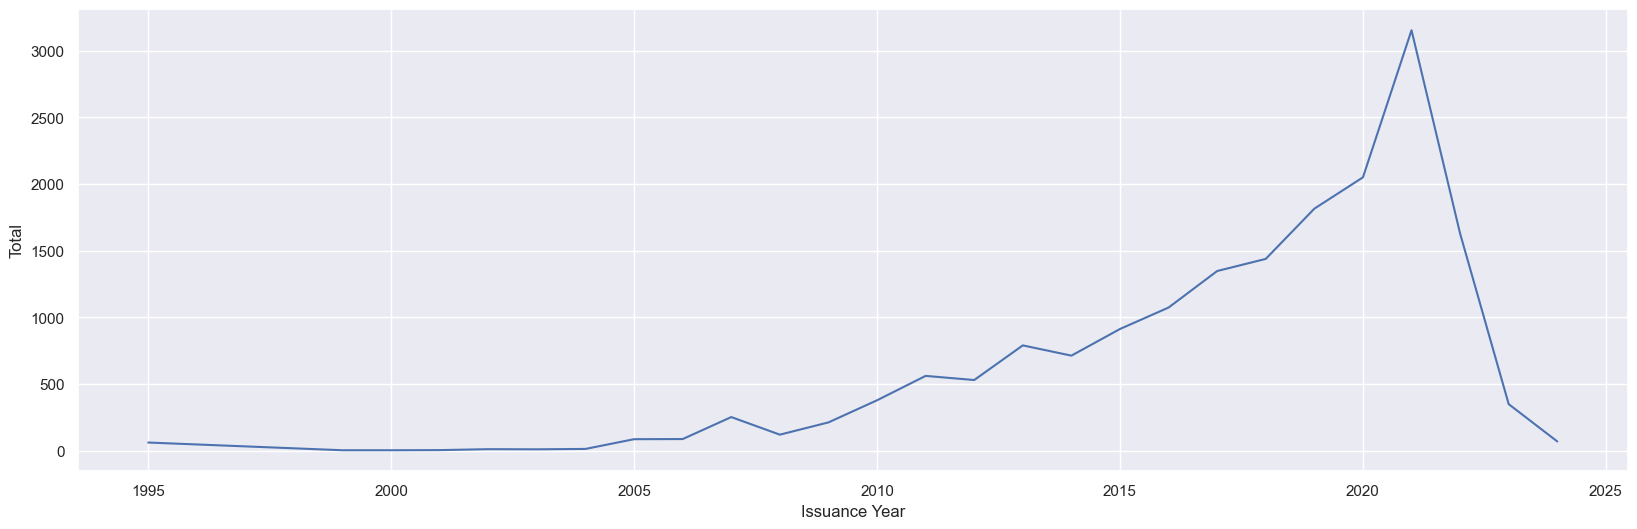

In [75]:
sns.lineplot(x='Issuance Year',y='Total',data=Issuance_Data)
sns.set(rc={'figure.figsize':(20,6)})
plt.show()

In [96]:
Issuance_Data['Total'].mean()

np.float64(653.7037037037037)

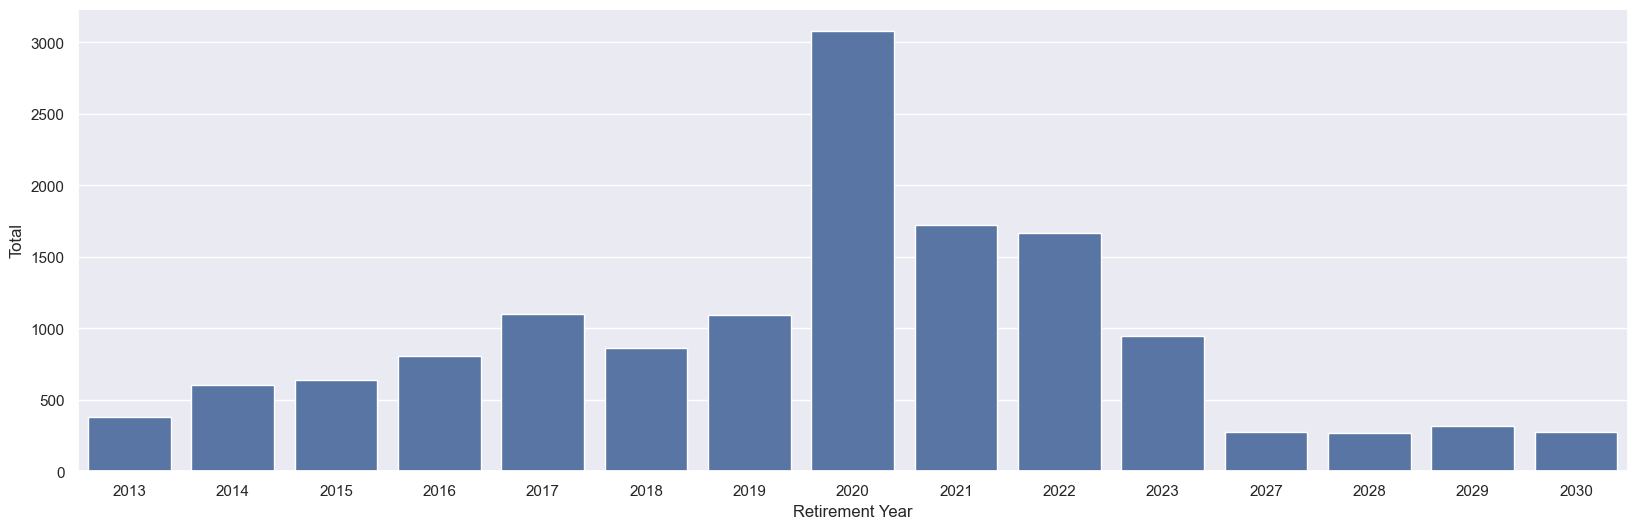

In [71]:
sns.barplot(x='Retirement Year',y='Total',data=Retirement_Data)
sns.set(rc={'figure.figsize':(20,6)})
plt.show()

In [97]:
Retirement_Data['Total'].mean()

np.float64(935.3333333333334)

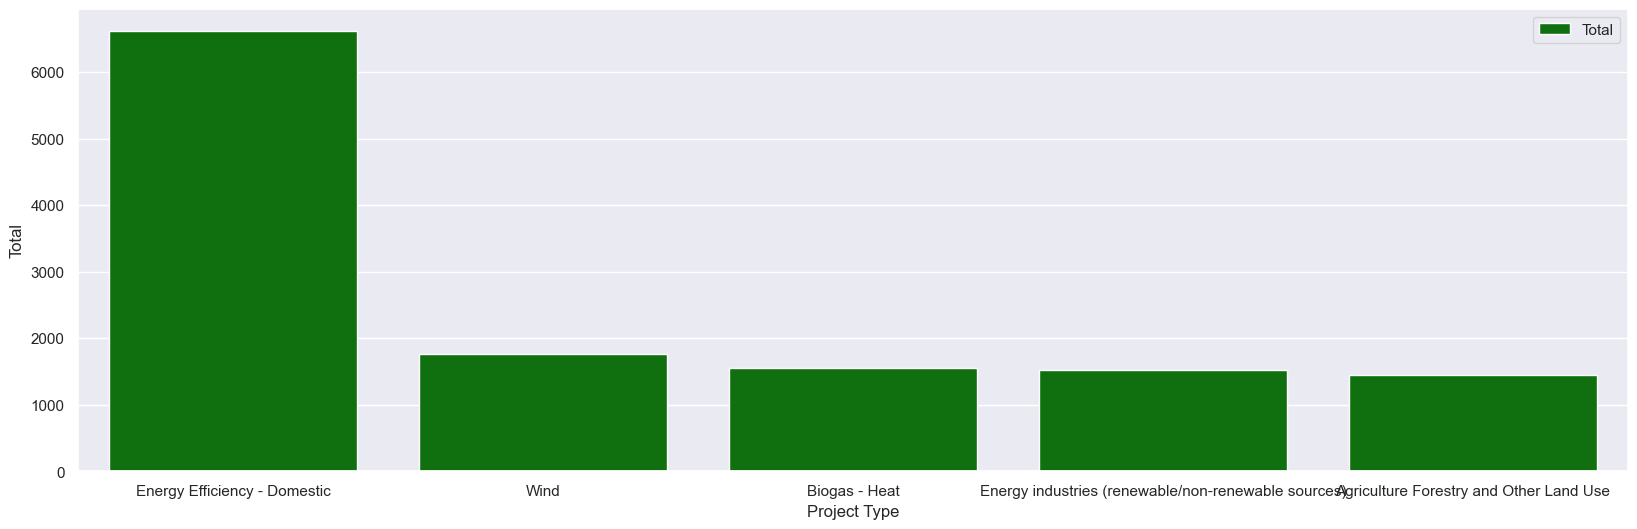

In [82]:
sns.barplot(x='Project Type',y='Total',data=Project_Type,color='green',label='Total')
sns.set(rc={'figure.figsize':(20,6)})
plt.show()

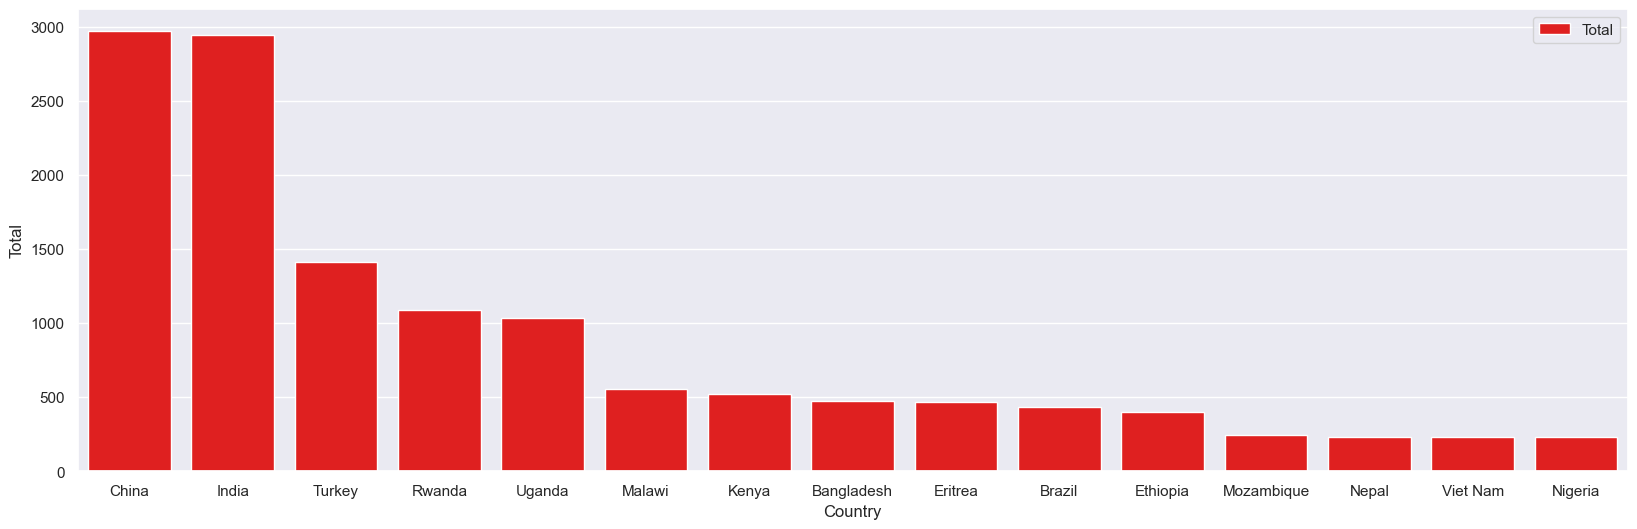

In [86]:
sns.barplot(x='Country',y='Total',data=Geography,color='red',label='Total')
sns.set(rc={'figure.figsize':(20,6)})
plt.show()

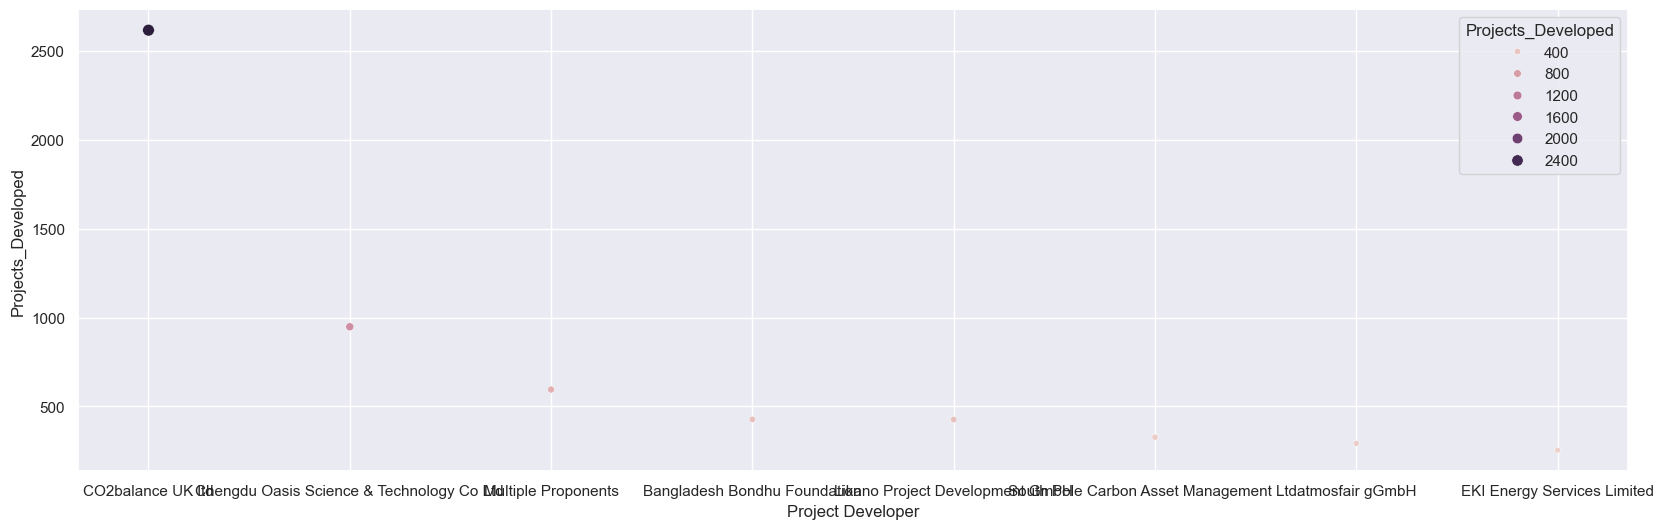

In [95]:
sns.scatterplot(x='Project Developer',y='Projects_Developed',data=Developers_sort,hue='Projects_Developed',size='Projects_Developed')
sns.set(rc={'figure.figsize':(20,6)})
plt.show()